<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada</h1>
<h2>Pràctica 3 - Programació dinàmica</h2>
</center>
</div>

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt
import scipy.ndimage as nd
from tqdm.notebook import trange

%matplotlib inline

## Introducció a la llibreria _numpy_. Llistes vs arrays

In [3]:
# Els tractem igual tot i que són dos tipus de dades diferents
a = [1,2,3,4]
b = np.array([1,2,3,4])

print(a, type(a))
print(b, type(b))

[1, 2, 3, 4] <class 'list'>
[1 2 3 4] <class 'numpy.ndarray'>


In [4]:
# La suma de llistes i la suma d'arrays es comporta diferent
a1, a2 = [1,2,3,4], [5,6,7,8]
b1, b2 = np.array([1,2,3,4]), np.array([5,6,7,8])

print(a1+a2)
print(b1+b2)

[1, 2, 3, 4, 5, 6, 7, 8]
[ 6  8 10 12]


In [5]:
# Accedim a la dimensió d'una matriu de tamany 2x3. Observeu que la primera component és l'alçada i la segona l'amplada.
a = [[1,2,3], [4,5,6]]
b = np.array([[1,2,3],[4,5,6]])

print(len(a), len(a[0]))
print(b.shape)

2 3
(2, 3)


In [6]:
# Indexem igual per accedir a les files
print(a[0])
print(b[0])
print()
# En numpy podem seleccionar un element usant b[i,j] de la mateixa forma que podem fer b[i][j]
print(a[0][1])
print(b[0][1], b[0,1])

[1, 2, 3]
[1 2 3]

2
2 2


In [7]:
# Podem definir el 'tipus' de dada que volem fer servir
b1 = np.array([1,2,3,4], dtype=int)
b2 = np.array([1,2,3,4], dtype=float)

print(b1)
print(b2)

[1 2 3 4]
[1. 2. 3. 4.]


## Conceptes bàsics imatges

Una imatge en color, RGB, no és més que una matriu tridimensional $W\times H\times 3$ on $W$ és l'amplada, $H$ és l'alçada i 3 són els canals R (Red), G (Green), B (Blue).

<img src="./img/rgb.png" width=50%>

Shape: (32, 32, 3)


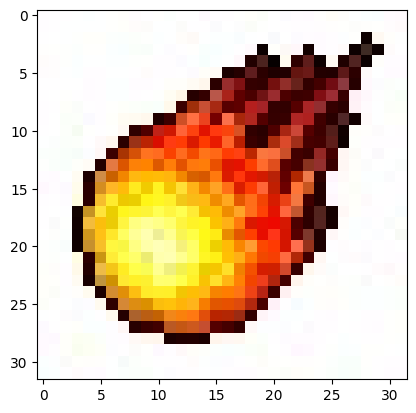

In [8]:
# Carreguem una imatge petita
# Generalment les imatges tenen valors de 0 a 255. Nosaltres treballarem en el rang 0 a 1 i per això dividim tots els valors per 255.
im = plt.imread('img/fireball.jpg')/255

# Així podem observar la seva mida.
print("Shape:",im.shape)

# Podem visualitzar-la utilitzant la funció 'imshow' de la llibreria matplotlib.pyplot
plt.imshow(im)
plt.show()

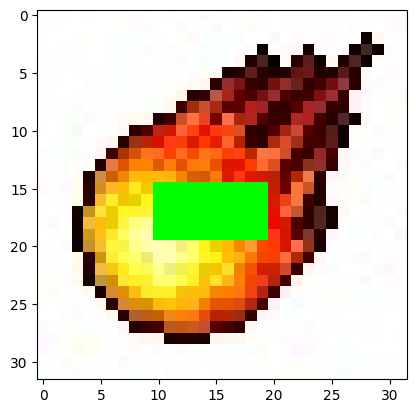

In [9]:
# Podem modificar-la utilitzant slicing
# Observeu que li assignem el color verd ja que [0, 1, 0] = [R, G, B] = [Red, Green, Blue]
im[15:20, 10:20] = [0,1,0]
plt.imshow(im)
plt.show()

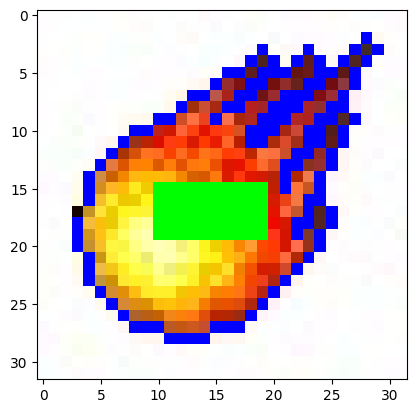

In [10]:
# També podem modificar-la usant una condició sobre els seus píxels
# Tots els píxels tals que la seva component verda (2a component, índex 1) sigui igual a zero,
# la transformem en color blau (0,0,1).
# Com podeu veure el color negre pur és [0,0,0] i, com que té la segona component blava a zero, 
# queda transformat en blau.

im[im[:,:,1] == 0] = [0,0,1]
plt.imshow(im)
plt.show()

<div class="alert alert-success">
    <h1>Problema 1: Implementació de l'algorisme Seam Carving</h1>
    <p>
        L'algorisme Seam Carving ens permet reduir la mida de les imatges en una de les seves dues dimensions (horitzontalment, per exemple) a través d'un algorisme senzill de programació dinàmica. Ens permet fer la següent reducció:
    </p>    
    <img src='img/seamcarving.jpg' width='80%'><br>
    <b>Sembla màgia, no?</b><br><br>
    S'agafa la imatge original i se'n calcula el gradient. A continuació es generen tots els camins a través de la programació dinàmica, es troba un camí mínim i s'elimina. Es repeteix aquest procediment fins a obtenir el resultat desitjat. Observa'n un altre exemple:
    <img src='img/seamcarving_alg.png' width='80%'><br>
    En aquest cas hem reduit la imatge original en 150 píxels, horitzontalment. Com veieu, la major part dels objectes es conserven ja que s'han eliminat zones 'suaus' com el cel i la sorra.
    <br><br>
    <h3>Implementació</h3>
    <ol>
        <li> Implementeu una funció <code>superior_neighbors</code> que retorni els veïns superiors d'un punt d'una imatge 2-D. A la capçalera de la funció trobareu els tres casos que cal tenir en compte
        <li> Implementeu una funció <code>minimal_paths</code> que, usant el següent algorisme de programació dinàmica, construeixi la matriu de camins, $D$. Aquesta funció ha d'usar la funció <code>superior_neighbors</code> per obtenir els veïns.<br>
            Sigui $G$ la imatge de gradient i sigui $D$ la matriu de camins mínims que hem d'omplir, ambdues de dimensió $H \times W$ :
            $$D_{i,j} = \begin{cases}
                            G_{i,j}+\min\Big(D_{i-1, j},\ D_{i-1,j+1}\Big) \quad \text{if} \ j=0\\
                            G_{i,j}+\min\Big(D_{i-1, j-1},\ D_{i-1, j}\Big) \quad \text{if} \ j=W-1\\
                            G_{i,j}+\min\Big(D_{i-1, j-1},\ D_{i-1, j},\ D_{i-1,j+1}\Big) \quad \text{else}                                      
                        \end{cases}$$
        <li> Implementeu una funció <code>find_min_path</code> que retorni el camí mínim sobre la imatge anterior, $D$. Per trobar-lo, l'algorisme ha de començar per la part inferior de la imatge i anar pujant fins a arribar a la part superior.
        <li> Implementeu una funció <code>delete_path</code> que elimini el camí mínim retornat per la funció anterior de la imatge original.
        <li> Implementeu una funció <code>reduce_image</code> que repeteixi tot el procés anterior un nombre finit de vegades, $N$.
    </ol>
</div>

Sigui $G$ la imatge de gradient i sigui $D$ la matriu de camins mínims que hem d'omplir, ambdues de dimensió $H \times W$ :
            $$D_{i,j} = \begin{cases}
                            G_{i,j}+\min\Big(D_{i-1, j},\ D_{i-1,j+1}\Big) \quad \text{if} \ j=0\\
                            G_{i,j}+\min\Big(D_{i-1, j-1},\ D_{i-1, j}\Big) \quad \text{if} \ j=W-1\\
                            G_{i,j}+\min\Big(D_{i-1, j-1},\ D_{i-1, j},\ D_{i-1,j+1}\Big) \quad \text{else}                                      
                        \end{cases}$$

Funcions auxiliars:

In [11]:
def get_gradient(im):
    """
    Donada una imatge, en calcula el gradient
    
    Params
    ======
    :im: Imatge de la que en volem calcular el gradient
    
    Returns
    =======
    :gradient: Gradient horitzontal de la imatge
    
    """
    
    # Transformem la imatge a un sol canal (blanc i negre)
    im_blackwhite = np.dot(im[...,:3], [0.299, 0.587, 0.114])
    
    # Calculem el gradient usant sobel
    gradient = np.abs(nd.sobel(im_blackwhite))
    return gradient


def show_row(im_and_titles):
    """
    Donat un conjunt d'imatges i els seus títols, els mostra en una sola línia
    
    Params
    ======
    :im_and_titles: Llista de tuples en el format [(im, title), ...]    
    """
    
    # Creem una figura d'una sola línia
    fig, axs = plt.subplots(1,len(im_and_titles),figsize=(len(im_and_titles)*8,5))
    
    # Iterem el conjunt d'imatges i mostrem la imatge amb el seu títol
    for i, (im, title) in enumerate(im_and_titles):
        axs[i].imshow(im)
        axs[i].set_title(title)
        axs[i].set_axis_off()

    plt.tight_layout()
    plt.show()
    
    
def add_min_path(im, path, color=[1,0,0]):
    """
    Donada una imatge i un camí, afegeix el camí en un color donat. Per defecte, vermell.
    
    Params
    ======
    :im: Imatge sense el camí
    :path: Camí que volem afegir
    :color: Color del camí
    
    Returns
    =======
    :im: Imatge amb el camí afegit
    """
    for i, j in path:
        im[i][j]=color
    return im

Exemple d'ús:

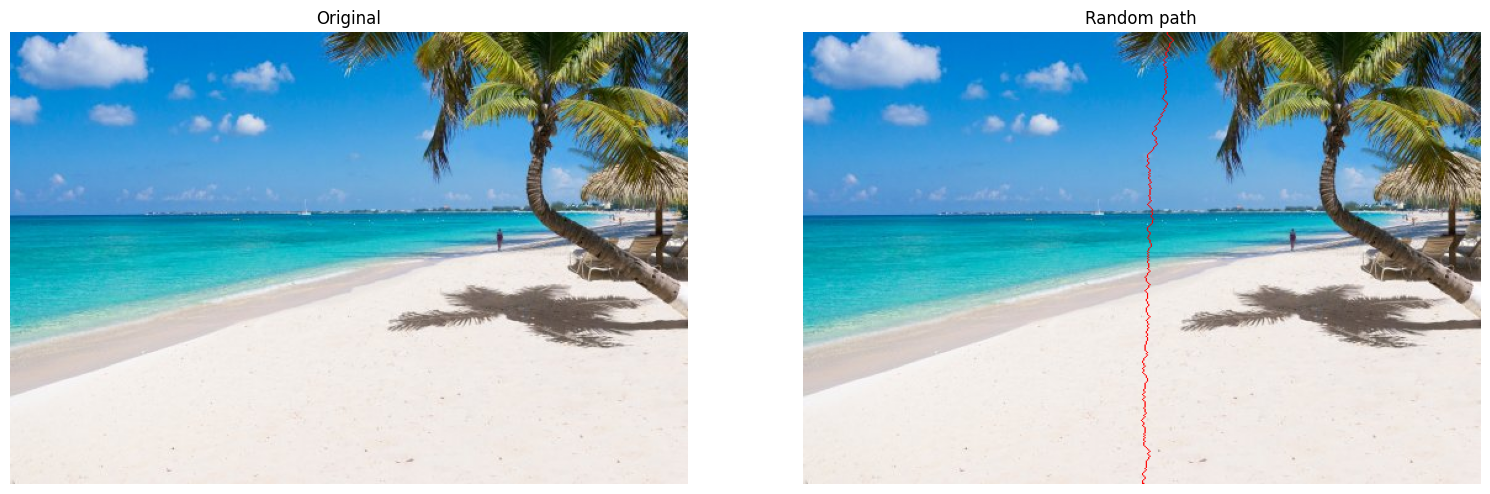

In [12]:
# Carreguem una imatge
im = plt.imread('img/beach.jpg')/255

# Creem un camí aleatori
i = im.shape[0]-1
path = [(i, im.shape[1]//2)]
while i >= 0:
    path.append((i, min(max(0, path[-1][1] + random.randint(-1,1)),im.shape[1]-1)))
    i-=1

# Afegim el camí a una imatge diferent
im_path = im.copy()
im_path = add_min_path(im_path, path)

# Usem la funció show_row per mostrar les imatges amb els seus títols.
im_titles = [(im, 'Original'), (im_path, 'Random path')]
show_row(im_titles)

## Gradient horitzontal

El <b>gradient horitzontal</b> d'una imatge ens permet trobar els punts de màxim canvi <b>vertical</b> en una imatge. Dit d'una altra forma, ens ressalta els contorns verticals.<br><br>
Observeu com podem usar la funció <code>get_gradient()</code> que us donem implementada:

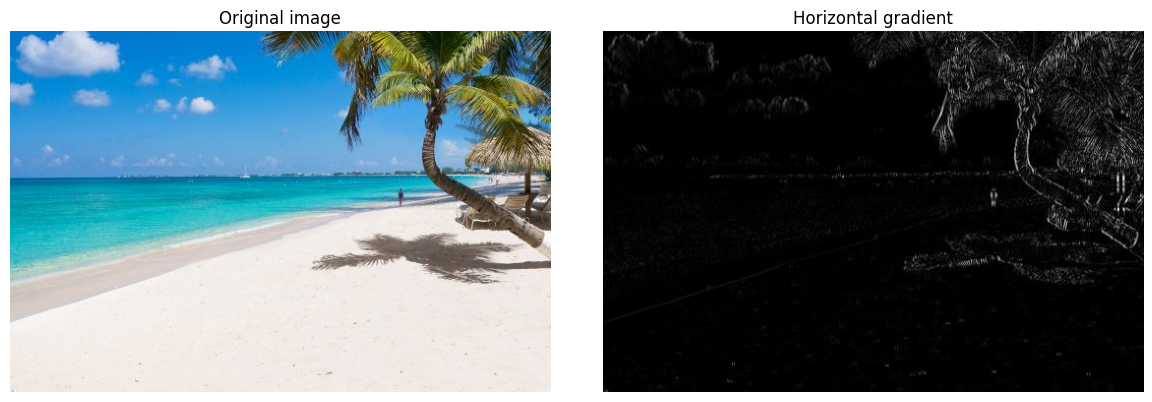

In [13]:
im = plt.imread('img/beach.jpg')/255

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Mostrem la imatge
axs[0].imshow(im)
axs[0].set_title('Original image')
axs[0].set_axis_off()

# Mostrem el gradient horitzontal de la imatge
gradient = get_gradient(im)
axs[1].imshow(gradient, cmap='gray')
axs[1].set_title('Horizontal gradient')
axs[1].set_axis_off()

plt.tight_layout()
plt.show()

In [14]:
def superior_neighbors(mat, point):
    """
    Donada una matriu de mida H x W i punt, retorna els punts de la fila superior adjacents al punt passat com a paràmetre.
    Cal tenir en compte els següents casos. Considerant que el punt té coordenades (i,j):
        - Si el punt té coordenada j=0, vol dir que estem agafant un punt del marge esquerre de la imatge. Només s'han de retornar DOS veïns.
        - Si el punt té coordenada j=(W-1), vol dir que estem agafant un punt del marge dret de la imatge. Només s'han de retornar DOS veïns.
        - En la resta de casos, es retornen els tres veïns superiors.
        
    Params
    ======
    :mat: Una matriu 2-Dimensional
    :point: Un sol punt amb el format (i,j)
    
    Returns
    =======
    :neighbors: Una llista de dos o tres elements en funció de cada cas.
    """
    
    neighbors = []
    
    # EL TEU CODI AQUÍ

    i, j = point

    if j == 0: # Margen izquierdo de la imagen.
        neighbors = [(i-1, j), (i-1, j+1)]

    elif j == mat.shape[1]-1: # Margen derecho de la imagen.
        neighbors = [(i-1, j-1), (i-1, j)]
        
    else: # Cualquier otro caso.
        neighbors = [(i-1, j-1), (i-1, j), (i-1, j+1)]

    return neighbors


def minimal_paths(mat):
    """
    Creació de tots els camins mínims usant programació dinàmica.
    Cal usar la funció 'superior_neighbors' per trobar els veïns.
    
    Params
    ======
    :mat: Matriu 2-Dimensional d'entrada (gradient)
    
    Returns
    =======
    :ret: Matriu 2-Dimensional de la mateixa mida que 'mat' amb els camins mínims calculats.
    """
    
    ret = mat.copy()
    
    # EL TEU CODI AQUÍ
    H, W = mat.shape

    for i in range(1, H):
        for j in range(W):
            # Tomo una fila y uso el valor del gradiente de los vecinos superiores para calcular el actual.
            # Repito por cada fila de manera dinámica.
            neighbor_coords = superior_neighbors(ret, (i, j))  # Tomamos las coordenadas de cada vecino superior.
            neighbor_values = [ret[coord] for coord in neighbor_coords] # Hacemos una lista con el valor del gradiente de cada vecino superior.
            ret[i, j] = mat[i, j] + np.min(neighbor_values) # Tomamos el mínimo y sumamos al valor del gradiente actual.
            
    return ret


def find_min_path(mat):
    """
    Donada una matriu, calcula el camí mínim sobre aquesta. L'algorisme ha de començar per la part inferior i buscar el següents punts.
    
    Params
    ======
    :mat: Matriu de camins mínims
    
    Returns
    =======
    :min_path: Una llista de tuples amb les coordenades (i,j) del camí mínim. La primera coordenada ha d'anar decrementant sempre en 1.
            Exemple. Suposant que una imatge té d'alçada 341 píxels, un possible camí seria: [(340, 120), (339, 121), (338,120), ..., (0, 151)] 
    """
    
    min_path = []

    # EL TEU CODI AQUÍ
    H, W = mat.shape
    if len(mat) > 0: # Si hay un elemento...

        bottom_coord = (H-1, 0)
        bottom_min = mat[bottom_coord] # Fijamos un mínimo temporal.

        for j in range(W):
            if mat[H-1, j] < bottom_min:
                bottom_coord = (H-1, j)
                bottom_min = mat[bottom_coord] # Si encontramos un mejor mínimo, anotamos sus coordenadas.

        # Tenemos ahora el valor mínimo de la fila inferior. Ahora todo consiste en subir.

        for i in range(H-2, -1, -1):

            min_path.append(bottom_coord)               # Añadimos la coordenada con menor gradiente.
            top_nei = superior_neighbors(mat, bottom_coord)  # Vemos los vecinos superiores.
            bottom_min = mat[top_nei[0]]                # Tomamos un mínimo arbirtrario.

            for nei in top_nei:                 # Por cada vecino superior.
                if mat[nei] <= bottom_min:       # Encontramos el valor mínimo de gradiente.
                    bottom_min = mat[nei]       # Lo guardamos.
                    bottom_coord = nei          # Y guardamos la coordenada del mínimo superior.

        min_path.append(bottom_coord) # Añadimos el último que nos falta.

    return min_path


def delete_path(im, path):
    """
    Donat una imatge i un camí, elimina els pixels de la imatge que pertanyen del camí.
    Podeu usar la següent instrucció per inicialitzar la imatge. Això crea una imatge amb tots els valors a zero.
    
    im_new = np.zeros((im.shape[0], im.shape[1]-1, im.shape[2]))
    
    Params
    ======
    :im: Una imatge de mida H x W x 3
    :path: Un camí sobre la imatge. 
    
    Returns
    =======
    :im_new: Una nova imatge de mida H x (W-1) x 3 amb el camí eliminat
    """
    
    H, W, C = im.shape 

    im_new = np.zeros((H, W-1, C), dtype=im.dtype)
    
    # Para cada coordenada del x del camino a borrar, le damos como valor su y correspondiente.
    KILLING_coord = {x: y for x, y in path} 
    
    for i in range(H):
        # Fijamos la columna que borraremos de la fila i. Esta idea consiste en,
        # usando la biyección de fila a la columna a borrar, vamos haciendo np.delete.
        # Como delete hace una copia, almacenamos la fila con la columna borrada en la fila correspondiente de new.
        col_to_delete = KILLING_coord[i]
        im_new[i] = np.delete(im[i], col_to_delete, axis=0) 
    
    return im_new # No te preocupes brochacho, yo también soy nuevo.


def reduce_image(im, N=100):    
    """
    Implementació de l'algorisme Seam Carving. 
    Useu la funció 'show_row' al finalitzar per mostrar una figura amb tres subfigures:
        - Imatge original
        - Primer camí que s'elimina
        - Imatge resultant després de N iteracions
    
    Params
    ======
    :im: Imatge que volem reduir
    :N: Nombre de cops que repetirem l'algorisme
    """
    
    showrow = [(im.copy(), "Original")]

    G = get_gradient(im)
    D = minimal_paths(G)
    first_path = find_min_path(D)
    im_first_path = im.copy()
    im_first_path = add_min_path(im_first_path, first_path) # Con esto habremos mostrado el primer camino que eliminaremos.
    showrow.append((im_first_path, "Primer camino"))
    im = delete_path(im, first_path)

    for _ in range(N-1): #  Como ya reducimos 1 camino, queda hacerlo N-1 veces.
        #                   La idea del bucle es: conseguimos el gradiente, calculamos la matriz de caminos mínimos,
        #                   encontramos el camino mínimo y lo borramos.

        G = get_gradient(im)
        D = minimal_paths(G)
        path = find_min_path(D)
        im = delete_path(im, path)

    showrow.append((im, "Reducida"))

    show_row(showrow)


Comproveu la vostra solució

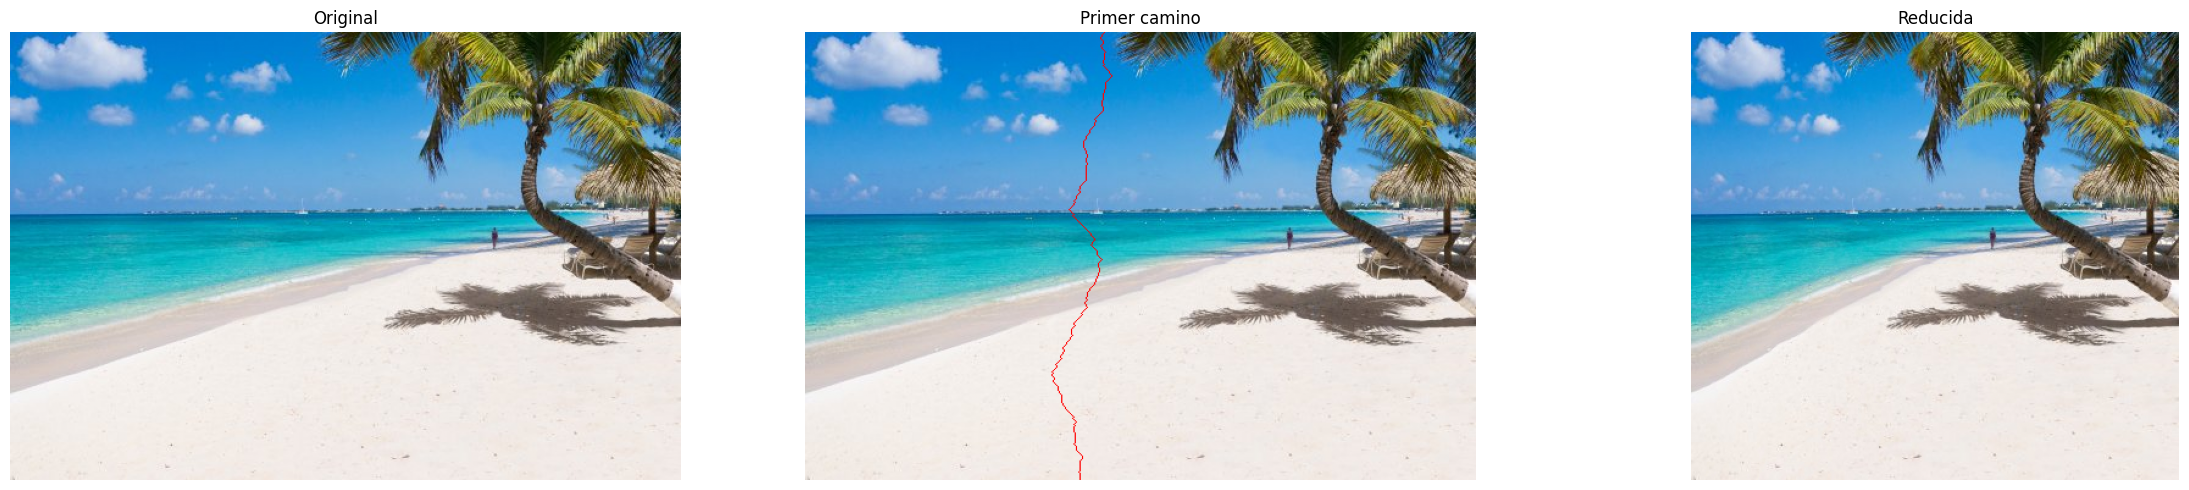

In [15]:
im = plt.imread('img/beach.jpg')/255
reduce_image(im, 150)

<div class="alert alert-success">
    <h1>Problema 2: Eliminar objectes d'una imatge</h1>
    <p>Modifiqueu l'algorisme anterior per a eliminar objectes d'una imatge. Només heu d'implementar la funció <code>remove_patch</code>. <br>Per exemple:</p>
    <img src='img/im_patched.png' width='80%'><br>
    <b>Pista:</b> Ens hem d'assegurar que els camins mínims sempre passin per l'interior del patch.
</div>

In [16]:
def add_patch(im, patch):
    """
    Donada una imatge i un patch. Mostra la imatge amb el patch d'un color donat. Per defecte, vermell.
    
    Params
    ======
    :im: La imatge a la que volem afegit el patch
    :patch: Patch amb quatre coordenades. Format: [(i1,j1), (i2, j2)]
    
    Returns
    =======
    :im: Imatge amb els píxels del patch en vermell.
    """
    
    for i in range(patch[0][0], patch[1][0]+1):
        for j in range(patch[0][1], patch[1][1]+1):
            im[i][j] = [1,0,0]
    return im

def remove_patch(im, patch):
    """
    Donada una imatge i un patch, n'elimina tots els punts interiors al patch.
    Useu la funció 'show_row' al finalitzar per mostrar una figura amb tres subfigures:
        - Imatge original
        - Imatge amb el patch de color vermell
        - Imatge resultant després d'eliminar el patch
    
    Params
    ======
    :im: Imatge original
    :patch: Patch amb dos parells de coordenades. 
            Format: [(i1,j1), (i2, j2)]. Sempre se satisfà que i1<i2, j1<j2.
            (i1, j1) és la coordenada superior esquerra del patch
            (i2, j2) és la coordenada inferior dreta del patch.
            Aquestes dues parelles s'han d'incloure com a part del patch.
    """

    # Añadimos el original y el objeto parcheado.
    show_patch = [(im.copy(), "Original")]
    add_patch(im, patch)
    show_patch.append((im.copy(), "Patch"))

    # Creamos una matriz que tenga true donde haya un píxel rojo puro. 
    still_reds = np.all(im == [1, 0, 0], axis=2)

    while np.any(still_reds): # Si hay un píxel rojo...
        G = get_gradient(im) 
        G[still_reds] = -1000.0 # Volvemos su gradiente negativo, de forma que atraiga los caminos mínimos.
        D = minimal_paths(G)    # Obtenemos caminos mínimos.

        path = find_min_path(D) # Creamos el camino, lo eliminamos, y volvemos a comprobar las posiciones de los píxeles rojos.
        im = delete_path(im, path)
        still_reds = np.all(im == [1, 0, 0], axis=2)

    # Una vez no queda ningún píxel rojo, lo añadimos y mostramos.
    show_patch.append((im, "Objeto eliminado"))

    show_row(show_patch)


Comproveu la vostra solució.

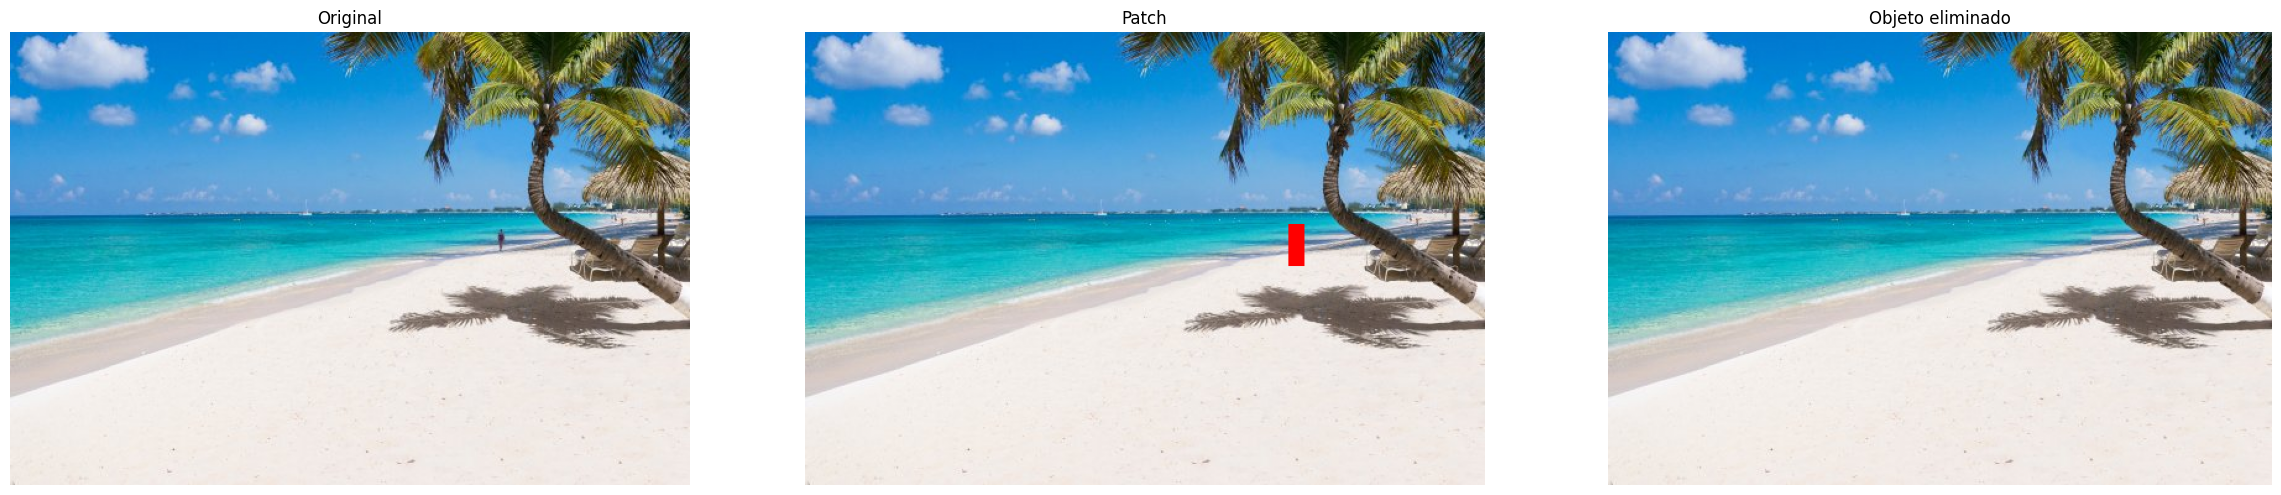

In [17]:
im = plt.imread('img/beach.jpg')/255
patch = [(156,391), (189,403)]

remove_patch(im, patch)

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>

<p>
L'entrega es farà a través del campus virtual. Teniu fins el dia <b>30 de Desembre a les 23:59</b> per entregar la pràctica. A la tasca que obrirem al campus, <b>només heu d'entregar aquest fitxer .ipynb</b>. El notebook ha de tenir com a nom:
</p>
<p>
    <code>Grup_Cognom1_Nom1_Grup_Cognom2_Nom2_Greedy.ipynb</code>
</p>
On 'Grup' és una sola lletra que identifica el <b>grup de laboratori</b> on esteu matriculats (A, B, C, D, E, F). <b>Només ha d'entregar un dels dos membres de la parella.</b>

És imprescindible que respecteu el format de les funcions i que el vostre codi estigui degudament comentat.<br><br>
</div>